# Data Preprocessing & Modeling - Prediksi Kesejahteraan

Notebook ini melakukan preprocessing data dan pemodelan menggunakan Random Forest Classifier untuk memprediksi tingkat kesejahteraan.

**Fitur yang digunakan:**
1. `jumlah_penduduk_miskin`
2. `jumlah_pengangguran_terbuka`
3. `pdrb_total_adhk`
4. `harapan_lama_sekolah`

**Target:** `kesejahteraan`

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

## 1. Load Dataset

In [33]:
# Path ke dataset
DATA_PATH = '../dataset/dataset_akhir/dataset_final.csv'

try:
    df = pd.read_csv(DATA_PATH)
    print("Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {DATA_PATH}. Please check the path.")

df.head()

Dataset loaded successfully!
Shape: (405, 17)


,id,kode_provinsi,nama_provinsi,nama_kabupaten_kota,jumlah_penduduk,jumlah_penduduk_miskin,jumlah_pengangguran_terbuka,pdrb_total_adhk,harapan_lama_sekolah,tahun,skor,kesejahteraan,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,32,JAWA BARAT,BOGOR,4813880,477200,686459,9.293200e+10,3,2010,149.587717,Sangat Sejahtera,NaN,NaN,NaN,NaN,NaN
1,2,32,JAWA BARAT,SUKABUMI,2358420,249600,255889,2.860100e+10,3,2010,46.247550,Tidak Sejahtera,NaN,NaN,NaN,NaN,NaN
2,3,32,JAWA BARAT,CIANJUR,2186790,311000,302214,1.969700e+10,3,2010,25.099967,Sangat Tidak Sejahtera,NaN,NaN,NaN,NaN,NaN
3,4,32,JAWA BARAT,BANDUNG,3205120,296300,556729,4.843200e+10,3,2010,70.089217,Cukup,NaN,NaN,NaN,NaN,NaN
4,5,32,JAWA BARAT,GARUT,2422330,335600,295040,2.546500e+10,3,2010,36.584667,Sangat Tidak Sejahtera,NaN,NaN,Harapan Lama Sekolah,NaN,NaN


## 2. Feature Selection & Cleaning

In [34]:
# Fitur yang diminta
selected_features = [
    'jumlah_penduduk_miskin',
    'jumlah_pengangguran_terbuka',
    'pdrb_total_adhk',
    'harapan_lama_sekolah'
]
target = 'kesejahteraan'

# Memastikan kolom ada di dataframe
missing_cols = [col for col in selected_features + [target] if col not in df.columns]
if missing_cols:
    print(f"Error: Columns not found: {missing_cols}")
else:
    df_model = df[selected_features + [target]].copy()
    print("Features selected successfully.")

# Cek missing values
print("\nMissing values per column:")
print(df_model.isnull().sum())

# Handling missing values (jika ada, misal drop atau fillna)
# Di sini kita drop baris yang targetnya kosong
df_model = df_model.dropna(subset=[target])

# Isi missing values di fitur dengan median/mean atau 0 (disesuaikan)
for col in selected_features:
    if df_model[col].isnull().sum() > 0:
        df_model[col] = df_model[col].fillna(df_model[col].median())

print(f"\nShape after cleaning: {df_model.shape}")

Features selected successfully.

Missing values per column:
jumlah_penduduk_miskin         0
jumlah_pengangguran_terbuka    0
pdrb_total_adhk                0
harapan_lama_sekolah           0
kesejahteraan                  0
dtype: int64

Shape after cleaning: (405, 5)


## 3. Preprocessing

In [35]:
# Encoding Target
le = LabelEncoder()
df_model['kesejahteraan_encoded'] = le.fit_transform(df_model[target])

print("Target Classes Mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"{i} : {class_name}")

# Memisahkan Fitur (X) dan Target (y)
X = df_model[selected_features]
y = df_model['kesejahteraan_encoded']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Target Classes Mapping:
0 : Cukup
1 : Sangat Sejahtera
2 : Sangat Tidak Sejahtera
3 : Sejahtera
4 : Tidak Sejahtera

Training set size: (324, 4)
Test set size: (81, 4)


In [36]:
# Scaling Features (Opsional tapi direkomendasikan)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled.")

Features scaled.


## 4. Modeling (Random Forest Classifier)

In [37]:
# Inisialisasi Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training Model
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = rf_model.predict(X_test_scaled)

print("Model training complete.")

Model training complete.


## 5. Evaluation

Accuracy Score: 0.9506

Classification Report:
                        precision    recall  f1-score   support

                 Cukup       0.90      0.90      0.90        10
      Sangat Sejahtera       1.00      1.00      1.00        32
Sangat Tidak Sejahtera       1.00      0.91      0.95        22
             Sejahtera       0.00      0.00      0.00         1
       Tidak Sejahtera       0.89      1.00      0.94        16

              accuracy                           0.95        81
             macro avg       0.76      0.76      0.76        81
          weighted avg       0.95      0.95      0.95        81



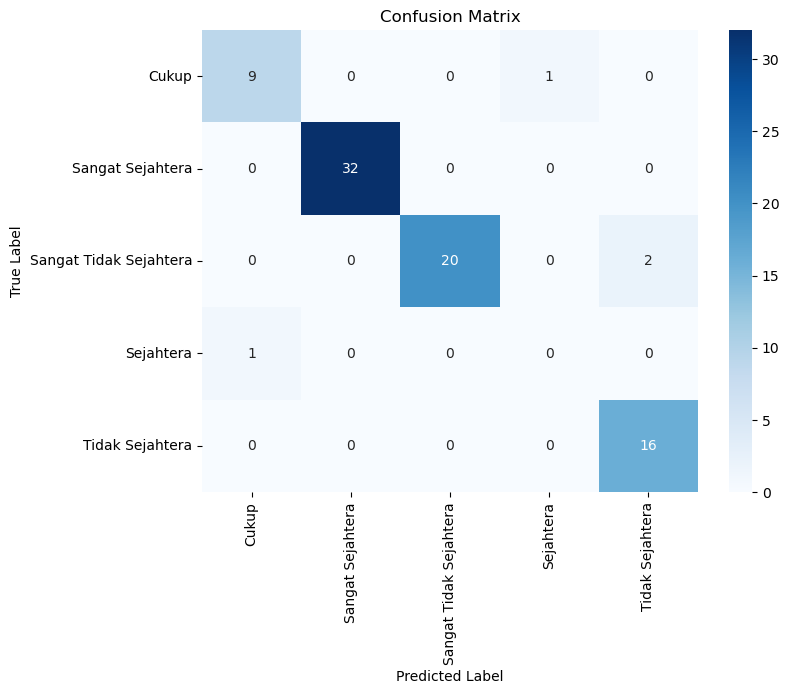

In [38]:
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

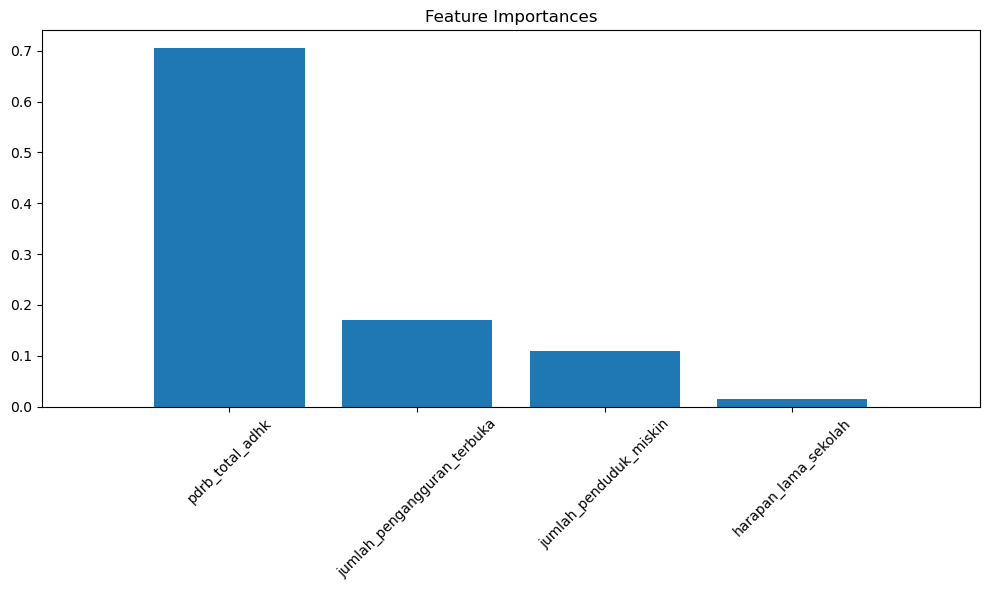

In [39]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [selected_features[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [40]:
# Save the preprocessed dataset to CSV in the preprocessing folder
output_path = 'dataset_preprocessed.csv'
df_model.to_csv(output_path, index=False)
print(f'Preprocessed dataset saved to {output_path}')


Preprocessed dataset saved to dataset_preprocessed.csv
